<a href="https://colab.research.google.com/github/MihoiIvan10/NUMERICOS-PYTHON/blob/main/fen_meno_de_runge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

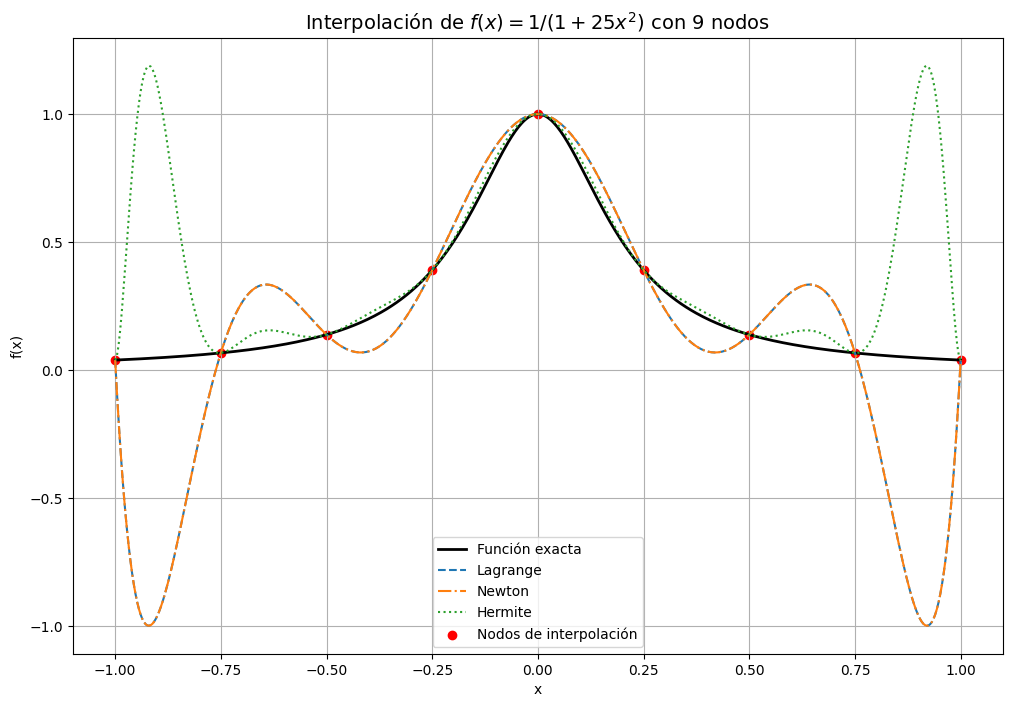

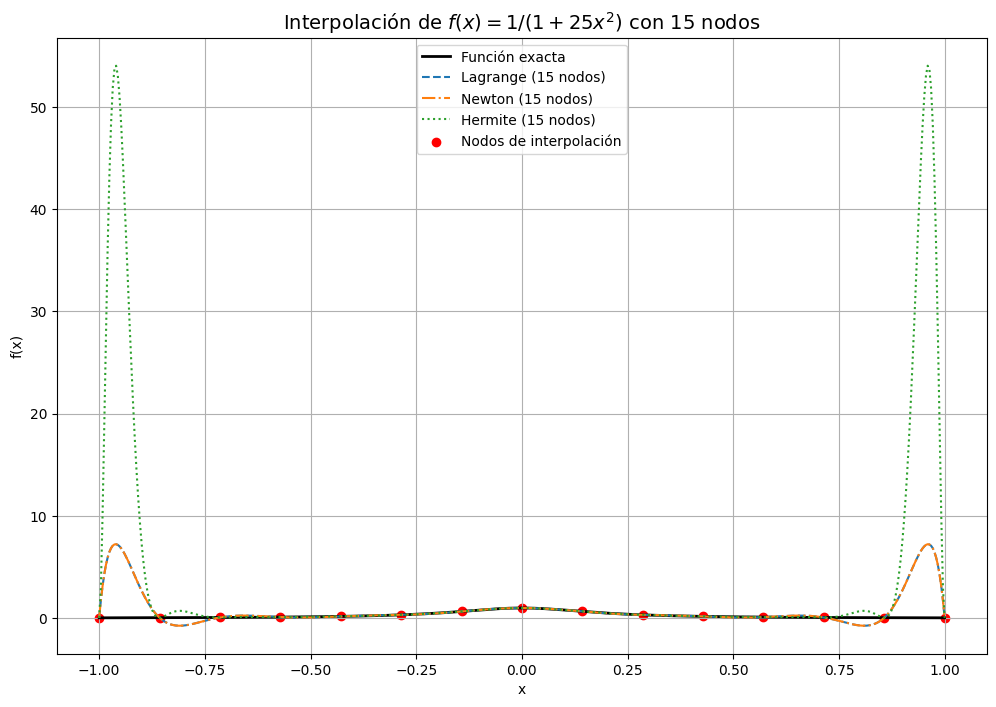

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# función
def f(x):
    return 1 / (1 + 25 * x**2)

# Derivada de la función
def df(x):
    return -50 * x / (1 + 25 * x**2)**2

# ----------------------------
# Método de Lagrange
# ----------------------------
def lagrange(x_nodes, y_nodes, x_eval):
    n = len(x_nodes)
    result = 0.0
    for i in range(n):
        term = y_nodes[i]
        for j in range(n):
            if j != i:
                term *= (x_eval - x_nodes[j]) / (x_nodes[i] - x_nodes[j])
        result += term
    return result

# --------------------------
# Método de Newton
# ----------------------------
def diferencias_interpolacion(x_nodes, f_y):
    n = len(x_nodes)
    F = np.zeros((n,n))
    for i in range(n):
        F[i][0] = f_y[i]
    for i in range(1,n):
        for j in range(1,i+1):
            F[i][j] = (F[i][j-1] - F[i-1][j-1]) / (x_nodes[i] - x_nodes[i-j])
    return F

def interpolacion_newton(x, x_nodes, F):
    n = len(x_nodes)
    P_x = F[0][0]
    res = 1
    for i in range(1,n):
        res *= (x - x_nodes[i-1])
        P_x += F[i][i] * res
    return P_x

# ----------------------------
# Método de Hermite
# --------------------
def hermite(x_nodes, f_x, df_x, x_eval):
    n = len(x_nodes)
    z = []
    Q = []
    for i in range(2 * n):
        fila = [0] * (2 * n)
        Q.append(fila)

    for i in range(n):
        z.append(x_nodes[i])
        z.append(x_nodes[i])
        Q[2*i][0] = f_x[i]
        Q[2*i+1][0] = f_x[i]
        Q[2*i+1][1] = df_x[i]
        if i > 0:
            Q[2*i][1] = (Q[2*i][0] - Q[2*i-1][0]) / (z[2*i] - z[2*i-1])

    for i in range(2, 2*n):
        for j in range(2, i+1):
            Q[i][j] = (Q[i][j-1] - Q[i-1][j-1]) / (z[i] - z[i-j])

    result = Q[0][0]
    product = 1.0
    for i in range(1, 2*n):
        product *= (x_eval - z[i-1])
        result += Q[i][i] * product

    return result

# ----------------------------
# Configuración inicial
# ----------------------------
n = 9  # Número de nodos (9 puntos desde x0=-1 hasta x8=1)
x_nodes = np.linspace(-1, 1, n)
y_nodes = f(x_nodes)
dy_nodes = df(x_nodes)

# Puntos para evaluar los polinomios
x_eval = np.linspace(-1, 1, 500)
y_true = f(x_eval)

# ----------------------------
# Interpolación con Lagrange
# ----------------------------
resultados1 = []
for x in x_eval:
    valor_interpolado = lagrange(x_nodes, y_nodes, x)
    resultados1.append(valor_interpolado)
y_lagrange = np.array(resultados1)

# ----------------------------
# Interpolación con Newton
# ----------------------------
F_newton = diferencias_interpolacion(x_nodes, y_nodes)
resultados2 = []
for x in x_eval:
    valor_interpolado = interpolacion_newton(x, x_nodes, F_newton)
    resultados2.append(valor_interpolado)
y_newton = np.array(resultados2)

# ----------------------------
# Interpolación con Hermite
# ----------------------------
resultados3 = []
for x in x_eval:
    p = hermite(x_nodes, y_nodes, dy_nodes, x)
    resultados3.append(p)
y_hermite = np.array(resultados3)

# ----------------------------
# Graficar resultados
# ----------------------------
plt.figure(figsize=(12, 8))

plt.plot(x_eval, y_true, label='Función exacta', linewidth=2, color='black')
plt.plot(x_eval, y_lagrange, label='Lagrange', linestyle='--')
plt.plot(x_eval, y_newton, label='Newton', linestyle='-.')
plt.plot(x_eval, y_hermite, label='Hermite', linestyle=':')
plt.scatter(x_nodes, y_nodes, color='red', label='Nodos de interpolación')

plt.title(f'Interpolación de $f(x) = 1/(1+25x^2)$ con {n} nodos', fontsize=14)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()

# ----------------------------
# Análisis con más nodos
# ----------------------------
n_large = 15  # Aumentamos el número de nodos
x_nodes_large = np.linspace(-1, 1, n_large)
y_nodes_large = f(x_nodes_large)
dy_nodes_large = df(x_nodes_large)

# Lagrange con más nodos
y_lagrange_large = np.array([lagrange(x_nodes_large, y_nodes_large, x) for x in x_eval])

# Newton con más nodos
F_newton_large = diferencias_interpolacion(x_nodes_large, y_nodes_large)
y_newton_large = np.array([interpolacion_newton(x, x_nodes_large, F_newton_large) for x in x_eval])

# Hermite con más nodos
y_hermite_large = np.array([hermite(x_nodes_large, y_nodes_large, dy_nodes_large, x) for x in x_eval])

# Graficar resultados con más nodos
plt.figure(figsize=(12, 8))

plt.plot(x_eval, y_true, label='Función exacta', linewidth=2, color='black')
plt.plot(x_eval, y_lagrange_large, label=f'Lagrange ({n_large} nodos)', linestyle='--')
plt.plot(x_eval, y_newton_large, label=f'Newton ({n_large} nodos)', linestyle='-.')
plt.plot(x_eval, y_hermite_large, label=f'Hermite ({n_large} nodos)', linestyle=':')
plt.scatter(x_nodes_large, y_nodes_large, color='red', label='Nodos de interpolación')

plt.title(f'Interpolación de $f(x) = 1/(1+25x^2)$ con {n_large} nodos', fontsize=14)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()